# Introduction

The goal of this notebook is to be a reference (mostly for myself) of how different ML-libraries are used. The goal is not to dive deep into every library, but rather to show minimal examples of how to create a model, how to train it, and how to predict using the trained model. Since the focus is not on the model itself we will use linear regression to keep it simple.

When picking a library for a real problem, I would chose scikit-learn for most ML-models that are not deep neural networks. This is because it is a very high level library which means that we need to write few lines of code. I would chose either PyTorch or Tensorflow for most deep neural network models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print('np.__version__:', np.__version__)
print('pd.__version__:', pd.__version__)
print('matplotlib.__version__:', matplotlib.__version__)
print('sklearn.__version__:', sklearn.__version__)
print('torch.__version__:', torch.__version__)
print('tf.__version__:', tf.__version__)

np.__version__: 1.16.5
pd.__version__: 0.25.1
matplotlib.__version__: 3.1.1
sklearn.__version__: 0.21.3
torch.__version__: 1.4.0
tf.__version__: 2.1.0


# Load dataset

We will use the diabetes dataset from `sklearn.datasets`, which you can read about in the scikit-learn documentation at https://scikit-learn.org/stable/datasets/index.html. To keep it as simple as possible we will only use one independent variable (the BMI of the patient which is the 3rd feature). Note from the documentation: *Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).*

In [2]:
x_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
print(x_diabetes.shape)
print(y_diabetes.shape)

(442, 10)
(442,)


In [3]:
x_diabetes = np.expand_dims(x_diabetes[:, 2], axis=1)
x_diabetes.shape

(442, 1)

In [4]:
y_diabetes = np.expand_dims(y_diabetes, axis=1)
y_diabetes.shape

(442, 1)

## Split into training and test sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_diabetes, y_diabetes, test_size=1/3, random_state=42)
print(f'x_train.shape={x_train.shape} x_test.shape={x_test.shape} y_train.shape={y_train.shape} y_test.shape={y_test.shape}')

x_train.shape=(294, 1) x_test.shape=(148, 1) y_train.shape=(294, 1) y_test.shape=(148, 1)


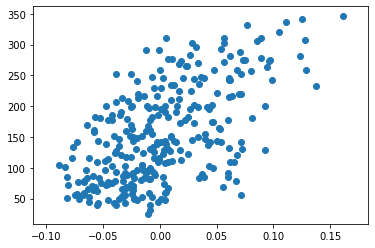

In [6]:
plt.scatter(x_train, y_train)

# Linear regression using scikit-learn

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = lr.predict(x_test)
y_pred.shape

(148, 1)

In [9]:
print('Coefficients:', lr.coef_)
print('Mean squared error (MSE) on test set:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) on test set:', r2_score(y_test, y_pred))

Coefficients: [[975.40444663]]
Mean squared error (MSE) on test set: 3891.300416804684
Coefficient of determination (R^2) on test set: 0.3158755200403638


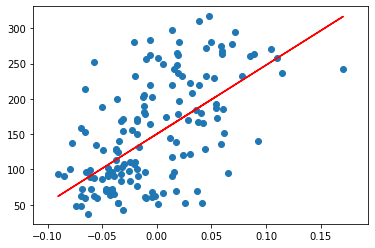

In [10]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()

# Linear regression using PyTorch

In [11]:
model = nn.Sequential(
    nn.Linear(1, 1)
)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)
x = torch.from_numpy(x_train.astype('float32'))
y = torch.from_numpy(y_train.astype('float32'))

In [12]:
for epoch in range(30000):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f'epoch: {epoch}, loss: {loss}')

epoch: 0, loss: 29218.537109375
epoch: 1000, loss: 5537.0126953125
epoch: 2000, loss: 5147.18798828125
epoch: 3000, loss: 4850.08154296875
epoch: 4000, loss: 4623.64208984375
epoch: 5000, loss: 4451.06201171875
epoch: 6000, loss: 4319.53076171875
epoch: 7000, loss: 4219.283203125
epoch: 8000, loss: 4142.88037109375
epoch: 9000, loss: 4084.650146484375
epoch: 10000, loss: 4040.27001953125
epoch: 11000, loss: 4006.445068359375
epoch: 12000, loss: 3980.665771484375
epoch: 13000, loss: 3961.018310546875
epoch: 14000, loss: 3946.04345703125
epoch: 15000, loss: 3934.630615234375
epoch: 16000, loss: 3925.932861328125
epoch: 17000, loss: 3919.30224609375
epoch: 18000, loss: 3914.25048828125
epoch: 19000, loss: 3910.400390625
epoch: 20000, loss: 3907.465087890625
epoch: 21000, loss: 3905.227783203125
epoch: 22000, loss: 3903.5234375
epoch: 23000, loss: 3902.224609375
epoch: 24000, loss: 3901.23388671875
epoch: 25000, loss: 3900.479248046875
epoch: 26000, loss: 3899.90380859375
epoch: 27000, los

In [13]:
y_pred = model(torch.from_numpy(x_test.astype('float32'))).data.numpy()
y_pred.shape

(148, 1)

In [14]:
print('Coefficients:', [parameter.data.numpy()[0][0] for parameter in list(model.parameters())[:-1]])
print('Mean squared error (MSE) on test set:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) on test set:', r2_score(y_test, y_pred))

Coefficients: [958.82715]
Mean squared error (MSE) on test set: 3885.7760751216565
Coefficient of determination (R^2) on test set: 0.31684674738757634


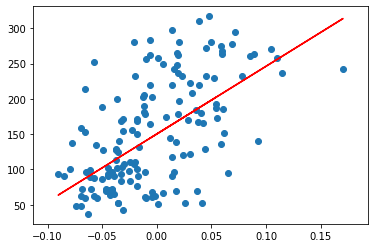

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()

# Linear regression using TensorFlow (Keras)

In [16]:
model = keras.Sequential([
    layers.Dense(1,  input_shape=[1])
])
optimizer = tf.keras.optimizers.SGD(0.03)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs=10000, verbose=0)
df_history = pd.DataFrame(history.history)
df_history['epoch'] = history.epoch
df_history.tail()

,loss,mse,epoch
9995,3903.331978,3903.332031,9995
9996,3912.830532,3912.830322,9996
9997,3907.018810,3907.018799,9997
9998,3903.294193,3903.294189,9998
9999,3903.312597,3903.312500,9999


In [18]:
y_pred = model.predict(x_test)
y_pred.shape

(148, 1)

In [19]:
print('Coefficients:', model.layers[0].get_weights()[0][0])
print('Mean squared error (MSE) on test set:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) on test set:', r2_score(y_test, y_pred))

Coefficients: [975.5109]
Mean squared error (MSE) on test set: 3899.4199731288577
Coefficient of determination (R^2) on test set: 0.31444803137261923


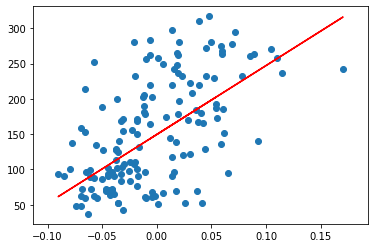

In [20]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()